# Profile

Nama: Austin Christian Yonatan 


---
## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

# pipeline preprocessing
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
# sequential API
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# funtional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
# classification report & confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

---
## Data Loading

In [2]:
df= pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#There are no duplicated rows
df.duplicated().sum()

0

---
## EDA

In [6]:
# Check unique value
print('Shape of Dataset : ', df.shape)
print('')

for col in df.columns.tolist():
  print('Col : ', col)
  print('Length Unique Value : ', df[col].unique())
  print('')

Shape of Dataset :  (7043, 21)

Col :  customerID
Length Unique Value :  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Col :  gender
Length Unique Value :  ['Female' 'Male']

Col :  SeniorCitizen
Length Unique Value :  [0 1]

Col :  Partner
Length Unique Value :  ['Yes' 'No']

Col :  Dependents
Length Unique Value :  ['No' 'Yes']

Col :  tenure
Length Unique Value :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Col :  PhoneService
Length Unique Value :  ['No' 'Yes']

Col :  MultipleLines
Length Unique Value :  ['No phone service' 'No' 'Yes']

Col :  InternetService
Length Unique Value :  ['DSL' 'Fiber optic' 'No']

Col :  OnlineSecurity
Length Unique Value :  ['No' 'Yes' 'No internet service']

Col :  OnlineBackup
Length Unique Value :  ['Yes' 'No' 'No internet service'

In [7]:
a=df['TotalCharges'].unique()
print(sorted(a))

[' ', '100.2', '100.25', '100.35', '100.4', '100.8', '100.9', '1001.2', '1001.5', '1003.05', '1004.35', '1004.5', '1004.75', '1005.7', '1006.9', '1007.8', '1007.9', '1008.55', '1008.7', '1009.25', '101.1', '101.45', '101.65', '101.9', '1010', '1011.05', '1011.5', '1011.8', '1012.4', '1013.05', '1013.2', '1013.35', '1013.6', '1014.25', '1016.7', '1017.35', '102.45', '102.5', '102.75', '1020.2', '1020.75', '1021.55', '1021.75', '1021.8', '1022.5', '1022.6', '1022.95', '1023.75', '1023.85', '1023.9', '1023.95', '1024', '1024.65', '1024.7', '1025.05', '1025.15', '1025.95', '1026.35', '1027.25', '1028.75', '1028.9', '1029.35', '1029.75', '1029.8', '103.7', '1031.1', '1031.4', '1031.7', '1032', '1032.05', '1033', '1033.9', '1033.95', '1035.5', '1035.7', '1036', '1036.75', '1037.75', '1039.45', '104.2', '104.3', '1041.8', '1042.65', '1043.3', '1043.35', '1043.4', '1043.8', '1045.25', '1046.1', '1046.2', '1046.5', '1047.7', '1048.45', '1048.85', '1049.05', '1049.6', '105.5', '105.6', '1050.5',

from list above there is no value in totalcharges colums.

In [8]:
# check row with no value in total charges colums
df[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


i assume this no value is missing value not 0

In [9]:
#input nan to no value in total charges
df['TotalCharges']=np.where(df['TotalCharges'] == ' ', np.nan, df['TotalCharges'])

In [10]:
# change data type to float
df['TotalCharges']=df['TotalCharges'].astype(float)

<AxesSubplot:xlabel='Churn', ylabel='Count'>

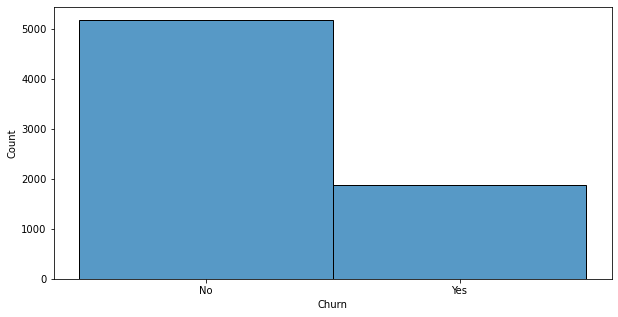

In [11]:
# Check data target

plt.figure(figsize=(10,5))
sns.histplot(df["Churn"], bins=5)

In [12]:
# Number of unique value
print(df["Churn"].value_counts())
print()
print(df["Churn"].value_counts(normalize=True)*100)

No     5174
Yes    1869
Name: Churn, dtype: int64

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64


we can see column target have 26.5% of the data Churn and 73.4% not churn

*Is SeniorCitizen more likely to Churn?*

<Figure size 864x288 with 0 Axes>

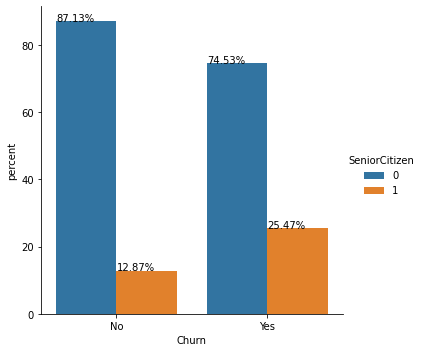

In [13]:
# dataset groupby churn and count percentage of every seniorcitizen
Ch_senciti = df.groupby('Churn')['SeniorCitizen'].value_counts(normalize=True)
Ch_senciti = Ch_senciti.mul(100).rename('percent').reset_index() 
# create graph
plt.figure(figsize=(12,4))
g=sns.catplot(data=Ch_senciti, x='Churn',y='percent', hue='SeniorCitizen', kind='bar')
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

from graph above, it look like if the person is senior citizen she/he is more likely Churn

*Is month to month contract more likely to Churn?*

<Figure size 864x288 with 0 Axes>

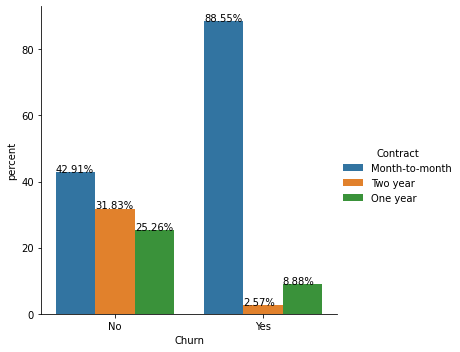

In [14]:
# dataset groupby churn and count percentage of every contract
Ch_senciti = df.groupby('Churn')['Contract'].value_counts(normalize=True)
Ch_senciti = Ch_senciti.mul(100).rename('percent').reset_index() 
# create graph
plt.figure(figsize=(12,4))
g=sns.catplot(data=Ch_senciti, x='Churn',y='percent', hue='Contract', kind='bar')
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

88.5% Churn have contract month to month. if the customer have contract month to month she/he is more likely Churn

In [15]:
age_d=df.groupby(['tenure','Churn']).apply(lambda x:x['tenure'].count()).reset_index(name='counts')
px.line(age_d,x='tenure',y='counts',color='Churn')

from graph above, the higher tenure the less likely customer churn

In [16]:
age_d=df.groupby(['MonthlyCharges','Churn']).apply(lambda x:x['MonthlyCharges'].count()).reset_index(name='counts')
px.line(age_d,x='MonthlyCharges',y='counts',color='Churn')

from graph above, it look like if the person with monthly charges more than 69 is more likely to churn

In [17]:
df['customerID'].duplicated().sum()

0

In [18]:
df.drop(columns='customerID', inplace=True)

---
## Preprocessing

**Split dataset**  
splitting dataset for data inference, data train, data validation, data test and split data categorical and numerical

In [19]:
df['Churn']=np.where(df['Churn'] == 'Yes', 1, 0)

In [20]:
# sampling data inference
data_inf= df.sample(10, random_state=5)
data_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4213,Female,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),50.80,288.05,1
5035,Male,0,No,No,20,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Electronic check,78.80,1641.30,0
3713,Male,1,Yes,No,46,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,80.40,3605.20,1
1720,Female,1,No,No,2,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),83.80,163.70,0
234,Female,0,No,No,29,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,25.15,702.00,0
4558,Female,1,No,No,27,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.25,2287.25,1
40,Male,0,Yes,Yes,10,Yes,No,DSL,No,Yes,No,No,No,No,One year,No,Mailed check,49.55,475.70,0
3455,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,90.55,90.55,1
5944,Male,0,No,No,12,Yes,No,DSL,Yes,No,No,Yes,No,No,Month-to-month,No,Mailed check,56.65,654.85,1
1089,Female,0,No,No,16,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),74.75,1129.35,0


In [21]:
# Drop data inference in data for train dan test
data_train_test= df.drop(data_inf.index)
data_train_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [22]:
#reset index
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

In [23]:
# define churn as target and drop churn in data predictor
X=data_train_test.drop(["Churn"], axis=1)
y=data_train_test["Churn"]

In [24]:
# Split data train dan test
X_train_full, X_test, y_train_full, y_test= train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)
# Split data train dan validation
X_train, X_val, y_train, y_val= train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=5, stratify=y_train_full )

In [25]:
# Split data categorical and numerical
num_dat=X_train_full[["tenure", "MonthlyCharges", "TotalCharges"]]
cat_dat=X_train_full.drop(columns=num_dat)
# save list columns 
num_col=num_dat.columns
cat_col=cat_dat.columns

In [26]:
#split categorical and numerical
X_train_num= X_train[num_col]
X_train_cat= X_train[cat_col]

X_val_num=X_val[num_col]
X_val_cat=X_val[cat_col]

X_test_num= X_test[num_col]
X_test_cat= X_test[cat_col]

c:\Users\Bloodink\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\Bloodink\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\Bloodink\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



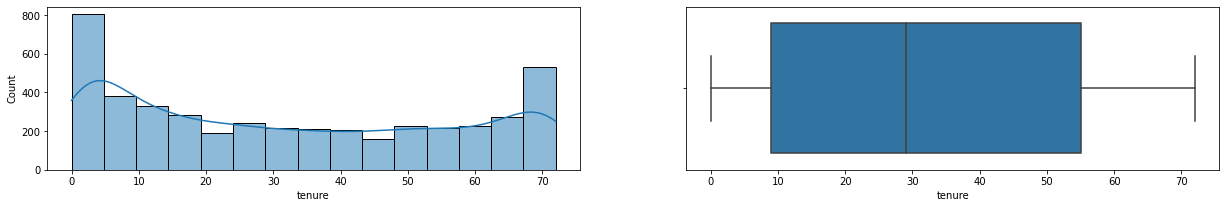

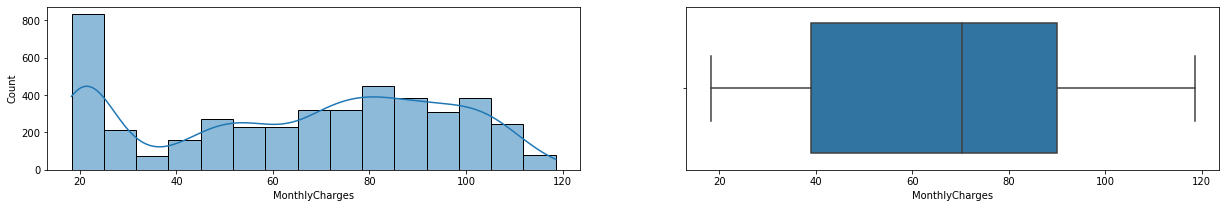

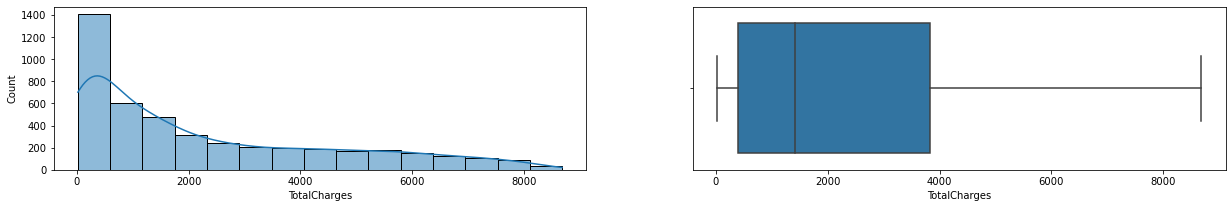

In [27]:
#Check nummerical distribution
for i in num_col:
    fig, axs = plt.subplots(1,2,figsize=(21,3));
    sns.histplot(X_train[i],bins=15, kde=True, ax=axs[0]);
    sns.boxplot(X_train[i], ax = axs[1]);

In [28]:
for i in num_col:
    print(i,"skewness value :", X_train[i].skew())

tenure skewness value : 0.23697070624560182
MonthlyCharges skewness value : -0.22475701319621322
TotalCharges skewness value : 0.9476214125777778


from result above, we can see only total charges column is skewed distributed

---
### Handling Missing Value

In [29]:
X_train.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        9
dtype: int64

In [30]:
X_val.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
dtype: int64

In [31]:
X_test.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        1
dtype: int64

In [32]:
y_train.isna().sum()

0

In [33]:
y_val.isna().sum()

0

In [34]:
y_test.isna().sum()

0

data with missing value will be inputed with their median because column with missing value is skew distributed

In [35]:
TotalCharges_median=X_train["TotalCharges"].median()

In [36]:
X_train["TotalCharges"] = X_train["TotalCharges"].fillna(TotalCharges_median)
X_val["TotalCharges"] = X_val["TotalCharges"].fillna(TotalCharges_median)
X_test["TotalCharges"] = X_test["TotalCharges"].fillna(TotalCharges_median)

In [37]:
#split data categorical and numerical after imputing missing value
X_train_num= X_train[num_col]
X_train_cat= X_train[cat_col]

X_val_num=X_val[num_col]
X_val_cat=X_val[cat_col]

X_test_num= X_test[num_col]
X_test_cat= X_test[cat_col]

---
### Handling Outliers

Check how many outliers on normal distributed columns

In [38]:
def find_normal_boundaries(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

In [39]:
upper_boundary, lower_boundary = find_normal_boundaries(X_train_num, 'tenure')
print('tenure % right end outliers : {}'.format(len(X_train_num[X_train_num['tenure'] > upper_boundary]) / len(X_train_num) * 100))
print('tenure % left end outliers  : {}'.format(len(X_train_num[X_train_num['tenure']< lower_boundary]) / len(X_train_num) * 100))
print('')

tenure % right end outliers : 0.0
tenure % left end outliers  : 0.0



In [40]:
upper_boundary, lower_boundary = find_normal_boundaries(X_train_num, 'MonthlyCharges')
print('MonthlyCharges % right end outliers : {}'.format(len(X_train_num[X_train_num['MonthlyCharges'] > upper_boundary]) / len(X_train_num) * 100))
print('MonthlyCharges % left end outliers  : {}'.format(len(X_train_num[X_train_num['MonthlyCharges']< lower_boundary]) / len(X_train_num) * 100))
print('')

MonthlyCharges % right end outliers : 0.0
MonthlyCharges % left end outliers  : 0.0



Check how many outliers on skew distributed columns

In [41]:
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [42]:
upper_boundary, lower_boundary = find_skewed_boundaries(X_train_num, 'TotalCharges',1.5)
print('% right end outliers : {}'.format(len(X_train_num[X_train_num['TotalCharges'] > upper_boundary]) / len(X_train_num) * 100))
print('% left end outliers  : {}'.format(len(X_train_num[X_train_num['TotalCharges']< lower_boundary]) / len(X_train_num) * 100))
print('')

% right end outliers : 0.0
% left end outliers  : 0.0



There is no outliers in the dataset

---
### Scaling
Here i used standardscaler because most numerical data is normal distributed

In [43]:
# mendefinisikan scaler
scaler= StandardScaler()
# fit data 
scaler.fit(X_train_num)
# transform data
X_train_scaled= scaler.transform(X_train_num)
X_val_scaled=scaler.transform(X_val_num)
X_test_scaled=scaler.transform(X_test_num)

---
### Encoding

here i use onehotencoding because all catergorial data we get from dataset is not ordinal

In [44]:
enc= OneHotEncoder()
enc.fit(X_train_cat)

X_train_enc= enc.transform(X_train_cat).toarray()
X_val_enc= enc.transform(X_val_cat).toarray()
X_test_enc= enc.transform(X_test_cat).toarray()

merge scaled numerical data with encoded categorical data

In [45]:
#merge scaled numerical data with encoded categorical data
X_train_final= np.concatenate([X_train_scaled,X_train_enc], axis=1)
X_val_final=np.concatenate([X_val_scaled,X_val_enc], axis=1)
X_test_final=np.concatenate([X_test_scaled,X_test_enc], axis=1)

In [46]:
# pipeline preprocessing
num_pipeline = make_pipeline(StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

pipe_pre=ColumnTransformer([
        ("num", num_pipeline, list(num_col)),
        ("cat", cat_pipeline, list(cat_col))
    ])


In [47]:
# fit pipeline
pipe_pre.fit(X_train,y_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges']),
                                ('cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['gender', 'SeniorCitizen', 'Partner',
                                  'Dependents', 'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

In [48]:
# pipeline tensorflow
train_dataset= tf.data.Dataset.from_tensor_slices((X_train_final, y_train)).batch(256) 
val_dataset= tf.data.Dataset.from_tensor_slices((X_val_final, y_val)).batch(256)
test_dataset=tf.data.Dataset.from_tensor_slices((X_test_final, y_test)).batch(256) 

---
## Model Definition

**create model with sequential API**

In [49]:
# sequential API

model_sequen = Sequential()
model_sequen.add(Dense(16, input_shape=(46,), activation='relu')) 
model_sequen.add(Dense(8, activation='relu'))
model_sequen.add(Dense(4, activation='relu'))
model_sequen.add(Dense(1, activation='sigmoid'))

In [50]:
# compile
model_sequen.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [51]:
# train
history_m_seq = model_sequen.fit(train_dataset, epochs=300, validation_data=(val_dataset), verbose=1)

Epoch 1/300
18/18 [==============================] - 1s 13ms/step - loss: 0.6424 - accuracy: 0.7233 - val_loss: 0.6210 - val_accuracy: 0.7353
Epoch 2/300
18/18 [==============================] - 0s 6ms/step - loss: 0.6027 - accuracy: 0.7349 - val_loss: 0.5801 - val_accuracy: 0.7353
Epoch 3/300
18/18 [==============================] - 0s 6ms/step - loss: 0.5635 - accuracy: 0.7349 - val_loss: 0.5405 - val_accuracy: 0.7353
Epoch 4/300
18/18 [==============================] - 0s 6ms/step - loss: 0.5282 - accuracy: 0.7349 - val_loss: 0.5043 - val_accuracy: 0.7353
Epoch 5/300
18/18 [==============================] - 0s 6ms/step - loss: 0.4978 - accuracy: 0.7349 - val_loss: 0.4745 - val_accuracy: 0.7353
Epoch 6/300
18/18 [==============================] - 0s 6ms/step - loss: 0.4758 - accuracy: 0.7349 - val_loss: 0.4559 - val_accuracy: 0.7353
Epoch 7/300
18/18 [==============================] - 0s 6ms/step - loss: 0.4631 - accuracy: 0.7349 - val_loss: 0.4457 - val_accuracy: 0.7353
Epoch 8/300


In [52]:
metrics_m_seq = pd.DataFrame(history_m_seq.history)
metrics_m_seq.tail()

,loss,accuracy,val_loss,val_accuracy
295,0.376013,0.820000,0.450323,0.785080
296,0.376141,0.821333,0.449895,0.781528
297,0.375826,0.820000,0.450769,0.782416
298,0.375868,0.820444,0.450900,0.784192
299,0.375645,0.821778,0.450280,0.781528


<AxesSubplot:>

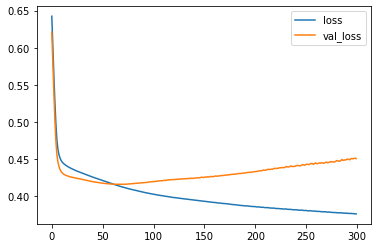

In [53]:
metrics_m_seq[['loss', 'val_loss']].plot()

from graph above, we can conclude this model is overfitting

---
**create model with funtional API**

In [54]:
# funtional API

input= Input(shape=(46,))
hidden_layer1=Dense(16, activation='relu')(input)
hidden_layer2=Dense(8, activation='relu')(hidden_layer1)
hidden_layer3=Dense(4, activation='relu')(hidden_layer2)
output=Dense(1, activation='relu')(hidden_layer3)

model_fn = Model(inputs=input, outputs=output)

In [55]:
# compile
model_fn.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [56]:
# train
history_m_fn = model_fn.fit(train_dataset, epochs=300, validation_data=(val_dataset), verbose=1)

Epoch 1/300
18/18 [==============================] - 1s 14ms/step - loss: 0.6681 - accuracy: 0.7300 - val_loss: 0.5685 - val_accuracy: 0.7353
Epoch 2/300
18/18 [==============================] - 0s 7ms/step - loss: 0.5382 - accuracy: 0.7349 - val_loss: 0.5043 - val_accuracy: 0.7353
Epoch 3/300
18/18 [==============================] - 0s 8ms/step - loss: 0.4962 - accuracy: 0.7349 - val_loss: 0.4722 - val_accuracy: 0.7380
Epoch 4/300
18/18 [==============================] - 0s 7ms/step - loss: 0.4693 - accuracy: 0.7433 - val_loss: 0.4505 - val_accuracy: 0.7673
Epoch 5/300
18/18 [==============================] - 0s 8ms/step - loss: 0.4543 - accuracy: 0.7658 - val_loss: 0.4375 - val_accuracy: 0.7966
Epoch 6/300
18/18 [==============================] - 0s 8ms/step - loss: 0.4465 - accuracy: 0.7836 - val_loss: 0.4298 - val_accuracy: 0.8082
Epoch 7/300
18/18 [==============================] - 0s 7ms/step - loss: 0.4413 - accuracy: 0.7876 - val_loss: 0.4260 - val_accuracy: 0.8135
Epoch 8/300


In [57]:
metrics_m_fn = pd.DataFrame(history_m_fn.history)
metrics_m_fn.tail()

,loss,accuracy,val_loss,val_accuracy
295,0.354238,0.821778,0.531719,0.793073
296,0.354542,0.821333,0.530936,0.790409
297,0.354520,0.821111,0.532707,0.788632
298,0.354172,0.821333,0.532635,0.787744
299,0.353902,0.822000,0.532072,0.792185


<AxesSubplot:>

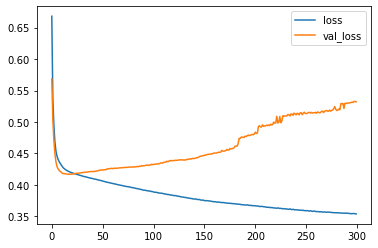

In [58]:
metrics_m_fn[['loss', 'val_loss']].plot()

from graph above, we can conclude this model is overfitting

---
## Model Evaluation

In [59]:
# Sequential API
threshold=0.5
y_pred = model_sequen.predict(X_test_final)
y_pred = np.where(y_pred >= threshold, 1, 0)
print(classification_report(y_test, y_pred))

44/44 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1034
           1       0.61      0.54      0.57       373

    accuracy                           0.79      1407
   macro avg       0.72      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



In [84]:
# Functional API
threshold=0.5
y_pred_fn = model_fn.predict(X_test_final)
y_pred_fn = np.where(y_pred_fn >= threshold, 1, 0)
print(classification_report(y_test, y_pred_fn))

44/44 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1034
           1       0.63      0.54      0.58       373

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.79      0.79      1407



from classification report above we can see this 2 model is quite good but they have low precision and recall when predict 1. I think imbalance data might be the problem.

---
## Model Improvement

Here i want to try to improve the model without handling the imbalance data, as we know the model above have overfitting problem, atleast i want to improve model so the model did not overfitting

**model improvement with sequential API**

In [61]:
# sequential API

model_sequen2 = Sequential()
model_sequen2.add(Dense(16, input_shape=(46,), activation='elu')) 
model_sequen2.add(tf.keras.layers.Dropout(rate=0.1))
model_sequen2.add(Dense(4, activation='elu'))
model_sequen2.add(tf.keras.layers.Dropout(rate=0.1))
model_sequen2.add(Dense(1, activation='sigmoid')) 


In [62]:
# compile
model_sequen2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adamax() , metrics=['accuracy'])

In [63]:
# train
history_m_seq2 = model_sequen2.fit(train_dataset, epochs=300, validation_data=(val_dataset), verbose=1)

Epoch 1/300
18/18 [==============================] - 1s 12ms/step - loss: 0.5809 - accuracy: 0.7251 - val_loss: 0.5427 - val_accuracy: 0.7345
Epoch 2/300
18/18 [==============================] - 0s 7ms/step - loss: 0.5441 - accuracy: 0.7371 - val_loss: 0.5096 - val_accuracy: 0.7380
Epoch 3/300
18/18 [==============================] - 0s 7ms/step - loss: 0.5208 - accuracy: 0.7404 - val_loss: 0.4862 - val_accuracy: 0.7478
Epoch 4/300
18/18 [==============================] - 0s 7ms/step - loss: 0.5014 - accuracy: 0.7513 - val_loss: 0.4692 - val_accuracy: 0.7673
Epoch 5/300
18/18 [==============================] - 0s 10ms/step - loss: 0.4903 - accuracy: 0.7658 - val_loss: 0.4566 - val_accuracy: 0.7877
Epoch 6/300
18/18 [==============================] - 0s 8ms/step - loss: 0.4817 - accuracy: 0.7671 - val_loss: 0.4474 - val_accuracy: 0.7957
Epoch 7/300
18/18 [==============================] - 0s 7ms/step - loss: 0.4760 - accuracy: 0.7742 - val_loss: 0.4405 - val_accuracy: 0.7993
Epoch 8/300

In [64]:
metrics_m_seq2 = pd.DataFrame(history_m_seq2.history)
metrics_m_seq2.tail()

,loss,accuracy,val_loss,val_accuracy
295,0.417358,0.804444,0.404977,0.803730
296,0.419889,0.805778,0.404878,0.805506
297,0.420405,0.800444,0.404829,0.804618
298,0.422676,0.799778,0.404644,0.803730
299,0.418886,0.804222,0.404482,0.805506


<AxesSubplot:>

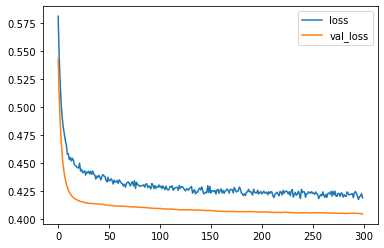

In [65]:
metrics_m_seq2[['loss', 'val_loss']].plot()

---
**model improvement with funtional API**

In [66]:
# funtional API

input2= Input(shape=(46,))

hidden_layer1_1=Dense(16, activation='relu')(input2)
drop1=tf.keras.layers.Dropout(0.2)(hidden_layer1_1)

hidden_layer2_1=Dense(4, activation='relu')(drop1)
drop2=tf.keras.layers.Dropout(0.2)(hidden_layer2_1)

output2=Dense(1, activation='sigmoid')(drop2)

model_fn2 = Model(inputs=input2, outputs=output2)


In [67]:
model_fn2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Nadam(), metrics=['accuracy'])


In [68]:
# train
history_m_fn2 = model_fn2.fit(train_dataset, epochs=300, validation_data=(val_dataset), verbose=1)


Epoch 1/300
18/18 [==============================] - 1s 16ms/step - loss: 0.7263 - accuracy: 0.5884 - val_loss: 0.5835 - val_accuracy: 0.6901
Epoch 2/300
18/18 [==============================] - 0s 9ms/step - loss: 0.6046 - accuracy: 0.6851 - val_loss: 0.5133 - val_accuracy: 0.7611
Epoch 3/300
18/18 [==============================] - 0s 10ms/step - loss: 0.5456 - accuracy: 0.7216 - val_loss: 0.4800 - val_accuracy: 0.7762
Epoch 4/300
18/18 [==============================] - 0s 9ms/step - loss: 0.5295 - accuracy: 0.7302 - val_loss: 0.4639 - val_accuracy: 0.7789
Epoch 5/300
18/18 [==============================] - 0s 9ms/step - loss: 0.5032 - accuracy: 0.7387 - val_loss: 0.4531 - val_accuracy: 0.7869
Epoch 6/300
18/18 [==============================] - 0s 10ms/step - loss: 0.4960 - accuracy: 0.7516 - val_loss: 0.4482 - val_accuracy: 0.7913
Epoch 7/300
18/18 [==============================] - 0s 8ms/step - loss: 0.4833 - accuracy: 0.7604 - val_loss: 0.4428 - val_accuracy: 0.7940
Epoch 8/30

In [69]:
metrics_m_fn2 = pd.DataFrame(history_m_fn2.history)
metrics_m_fn2.tail()


,loss,accuracy,val_loss,val_accuracy
295,0.406024,0.800667,0.415768,0.800178
296,0.411952,0.807111,0.414707,0.800178
297,0.413632,0.798667,0.415844,0.802842
298,0.406782,0.801111,0.415652,0.802842
299,0.408082,0.800000,0.415898,0.803730


<AxesSubplot:>

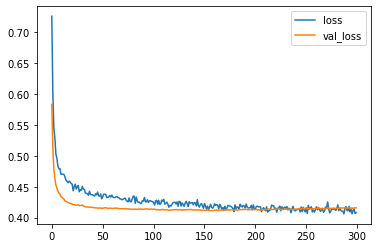

In [70]:
metrics_m_fn2[['loss', 'val_loss']].plot()

after adding dropout and delete 8 hidden nodes and changing activation function, we can see from graph above overfitting problem is solved

---
## Model Evaluation (improved model)

In [71]:
# Sequential API
threshold=0.5
y_pred2 = model_sequen2.predict(X_test_final)
y_pred2 = np.where(y_pred2 >= threshold, 1, 0)
print(classification_report(y_test, y_pred2))

44/44 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1034
           1       0.67      0.55      0.60       373

    accuracy                           0.81      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407



In [72]:
# compare to train data
threshold=0.5
y_pred3 = model_sequen2.predict(X_train_final)
y_pred3 = np.where(y_pred3 >= threshold, 1, 0)
print(classification_report(y_train, y_pred3))

141/141 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3307
           1       0.67      0.55      0.60      1193

    accuracy                           0.81      4500
   macro avg       0.76      0.72      0.74      4500
weighted avg       0.80      0.81      0.80      4500



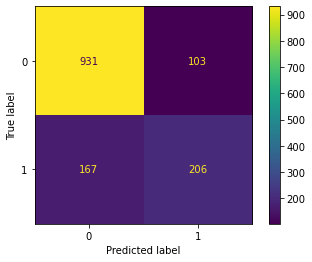

In [74]:
#confusion matrix
cm1 = confusion_matrix(y_test,y_pred2)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot()

---
**functional API**

In [75]:
# Functional API
threshold=0.5
y_pred_fn2 = model_fn2.predict(X_test_final)
y_pred_fn2 = np.where(y_pred_fn2 >= threshold, 1, 0)
print(classification_report(y_test, y_pred_fn2))

44/44 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1034
           1       0.64      0.58      0.61       373

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [76]:
# compare to train data
threshold=0.5
y_pred_fn3 = model_fn2.predict(X_train_final)
y_pred_fn3 = np.where(y_pred_fn3 >= threshold, 1, 0)
print(classification_report(y_train, y_pred_fn3))

141/141 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      3307
           1       0.68      0.61      0.65      1193

    accuracy                           0.82      4500
   macro avg       0.77      0.76      0.76      4500
weighted avg       0.82      0.82      0.82      4500



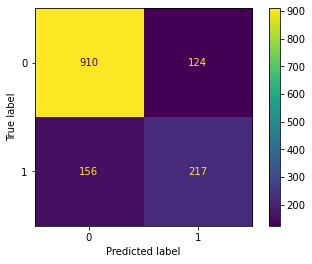

In [77]:
#confusion matrix
cm2 = confusion_matrix(y_test,y_pred_fn2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot()

- in improvement i try to add dropout with rate 0.1 in sequential API and 0.2 in functional API, change optimizer to Adamax in sequential API and nadam in functional API. I also try to delete hidden layer with 8 nodes
- From classification report above it look like model that i create with sequential API is better than Functional API, the model i create with functional API is slightly overfit, but if we look validation loss and loss graph above it look like model i create with functional API is better when dealing with overfit.
- From confusion matrix above it looks like this two model tend to predict class 0, maybe if we handle imbalance data can fix this problem

---
## Model Saving

In [78]:
#save improved model sequential
model_sequen2.save("model_sequential.h5")

#save improved model functional
model_fn2.save("model_fn.h5")

---
## Model Inference

In [79]:
data_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),50.80,288.05,1
1,Male,0,No,No,20,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Electronic check,78.80,1641.30,0
2,Male,1,Yes,No,46,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,80.40,3605.20,1
3,Female,1,No,No,2,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),83.80,163.70,0
4,Female,0,No,No,29,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,25.15,702.00,0
5,Female,1,No,No,27,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.25,2287.25,1
6,Male,0,Yes,Yes,10,Yes,No,DSL,No,Yes,No,No,No,No,One year,No,Mailed check,49.55,475.70,0
7,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,90.55,90.55,1
8,Male,0,No,No,12,Yes,No,DSL,Yes,No,No,Yes,No,No,Month-to-month,No,Mailed check,56.65,654.85,1
9,Female,0,No,No,16,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),74.75,1129.35,0


In [80]:
#load model
model1=tf.keras.models.load_model("model_sequential.h5")
model2=tf.keras.models.load_model("model_fn.h5")

In [81]:
#preprocess data inference using pipeline that we made before
preprocessed_data_inf=pipe_pre.transform(data_inf)

In [82]:
# predict wih model that created with sequential API
threshold=0.5
y_pred1 = model1.predict(preprocessed_data_inf)
y_pred1 = np.where(y_pred1 >= threshold, 1, 0)
y_pred_model1= pd.DataFrame(y_pred1, columns=["churn-predict"])
y_pred_model1

1/1 [==============================] - 0s 52ms/step


,churn-predict
0,0
1,1
2,0
3,1
4,0
5,1
6,0
7,1
8,0
9,1


In [83]:
# predict wih model that created with functional API
threshold=0.5
y_pred2 = model2.predict(preprocessed_data_inf)
y_pred2 = np.where(y_pred2 >= threshold, 1, 0)
y_pred_model2= pd.DataFrame(y_pred2, columns=["churn-predict"])
y_pred_model2

1/1 [==============================] - 0s 59ms/step


,churn-predict
0,0
1,1
2,0
3,1
4,0
5,1
6,0
7,1
8,0
9,0


---
## Conclusion

- From EDA, if the cutomer is senior citizen she/he is more likely Churn
- From EDA, it looks like if the cutomer with monthly charges more than 69 is more likely to churn.
- From EDA, if the customer have contract month to month she/he is more likely Churn

- From classification report above it look like model that i create with sequential API is better than Functional API, the model i create with functional API is slightly overfit, but if we look validation loss and loss graph above it look like model i create with functional API is better when dealing with overfit.
- From confusion matrix above it looks like this two model tend to predict class 0, maybe if we handle imbalance data can fix this problem
